[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/cheminformatics-workflow/notebooks/6-Chemical_substracture.ipynb)

# Chemical Substructure Searching

After the chemical dataset is formed and curated, it is important to have the capacity to navigate, filter, split or use the dataset in any way the user sees fit. One of the most important techniques for analyzing chemical datasets is **substructure search**, i.e., searching the dataset by a fixed, connected fragment that is i) shared by multiple compounds and ii) only describes a part of a compound.

## Content

1. [Import Libraries](#1)
2. [Load Data](#2)
3. [Visualize Molecules](#3)
4. [Substructure Search with SMARTS pattern](#4)
    - 4.1 [Has Substructure](#5)
        - 4.1.1 [Option 1 - apply function](#6)
        - 4.1.2 [Option 1 - for loop](#7)
    - 5.1 [Get Substructure](#8)
5. [More than 1 Chemical Substructure Search](#9)
    - 5.1 [Substructure 1 & Substructure 2](#10)
    - 5.2 [Substructure 1 OR Substructure 2](#11)

## 1. Import Libraries<a name = 1></a>

In [ ]:
!pip install rdkit

In [ ]:
!pip install mols2grid

In [ ]:
import pandas as pd
import numpy as np
import pickle
import stat

from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import Draw, PandasTools, AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools

IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

import mols2grid

import rdkit
rdkit.__version__

'2023.09.1'

## 2. Load Data<a name = 2></a>

In [ ]:
data = PandasTools.LoadSDF('AID_1259247_sanitized.sdf', molColName='Molecule')

In [ ]:
data.head()

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,<rdkit.Chem.rdchem.Mol object at 0x7f57e65e6110>
1,C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O,Active,active antagonist,inactive,-37.9252,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3ce82e0>
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.847,,<rdkit.Chem.rdchem.Mol object at 0x7f57b7c6a3b0>
3,CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...,Active,active antagonist,inactive,-35.5194,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651850>
4,CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2,Active,active antagonist,inactive,-39.4007,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651930>


In [ ]:
data['Antagonist Efficacy (%)'] = data['Antagonist Efficacy (%)'].astype('float64')

## 3. Visualize the Molecules<a name = 3></a>

In [ ]:
mols2grid.display(data, mol_col = 'Molecule', subset = ['Antagonist Efficacy (%)', 'PUBCHEM_ACTIVITY_OUTCOME'],
                  transform = {"Antagonist Efficacy (%)": lambda x: f"{x:.2f}"})

MolGridWidget()

## 4. Substructure search with SMARTS pattern<a name = 4></a>

### 4.1 Has Substructure<a name = 5></a>

In [ ]:
smarts1 = Chem.MolToSmarts(data['Molecule'][8])

In [ ]:
smarts1

'[#6]-[#6]-[#6]-[#6]-[#7]-[#16](=[#8])(=[#8])-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1'

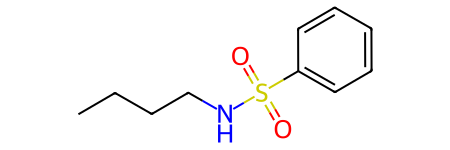

In [ ]:
data['Molecule'][8]

In [ ]:
pattern1 = Chem.MolFromSmarts(smarts1)

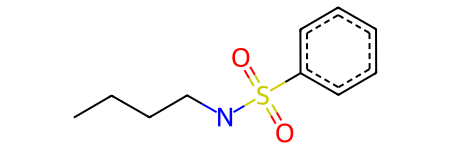

In [ ]:
pattern1

In [ ]:
match = [mol.HasSubstructMatch(pattern1) for mol in data['Molecule']]
match_mol = [1 if descriptor == True else 0 for descriptor in match]
print(match_mol)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### 4.1.1 Option 1 - apply function<a name = 6></a>

In [ ]:
data['Filter'] = data['Molecule'].apply(lambda x: x.HasSubstructMatch(pattern1))
data['Filter'] = data['Filter'].apply(lambda x: 1 if x == True else 0)
data.head()

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,Filter
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,<rdkit.Chem.rdchem.Mol object at 0x7f57e65e6110>,0
1,C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O,Active,active antagonist,inactive,-37.9252,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3ce82e0>,0
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.8470,,<rdkit.Chem.rdchem.Mol object at 0x7f57b7c6a3b0>,0
3,CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...,Active,active antagonist,inactive,-35.5194,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651850>,0
4,CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2,Active,active antagonist,inactive,-39.4007,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651930>,0


In [ ]:
data.loc[data['Filter'] == 1]

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,Filter
8,CCCCNS(=O)(=O)C1=CC=CC=C1,Active,active antagonist,inactive,-39.8567,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651b60>,1
122,C1C2CC(C1C=C2)C3NC4=CC(=C(C=C4S(=O)(=O)N3)S(=O...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b36c1620>,1
519,C1CN(CCN1CCCCN2C(=O)C3=CC=CC=C3S2(=O)=O)C4=NC=...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b353e7a0>,1
864,CC1=CC=C(C=C1)S(=O)(=O)N[C@@H](CCCCN)C(=O)CCl.Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b35b9460>,1
1054,C1CC2=C(C[C@@H]1NS(=O)(=O)C3=CC=C(C=C3)F)C4=CC...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b35dfd10>,1
1153,C1CCC(C1)CC2NC3=CC(=C(C=C3S(=O)(=O)N2)S(=O)(=O...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b360b840>,1
1277,CCCCCC1NC2=C(C=C(C(=C2)C(F)(F)F)S(=O)(=O)N)S(=...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b362bd80>,1
1313,CC1(CCCO1)CN(C)S(=O)(=O)C2=CC(=C(C=C2)Cl)S(=O)...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b344d310>,1
1814,C1CCC(C1)(C(=O)NO)N(CCC(=O)O)S(=O)(=O)C2=CC=C(...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b34f4f20>,1


#### 4.1.1 Option 2 - for loop<a name = 7></a>

In [ ]:
match_indicator = np.full((len(data), ), 0 , dtype = 'int64')

for i in range(0, len(data)):
    if data['Molecule'][i].HasSubstructMatch(pattern1):
        match_indicator[i] = 1

data['Filter'] = match_indicator

In [ ]:
filtered_mol = data.loc[data['Filter'] == 1]
filtered_mol

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,Filter
8,CCCCNS(=O)(=O)C1=CC=CC=C1,Active,active antagonist,inactive,-39.8567,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651b60>,1
122,C1C2CC(C1C=C2)C3NC4=CC(=C(C=C4S(=O)(=O)N3)S(=O...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b36c1620>,1
519,C1CN(CCN1CCCCN2C(=O)C3=CC=CC=C3S2(=O)=O)C4=NC=...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b353e7a0>,1
864,CC1=CC=C(C=C1)S(=O)(=O)N[C@@H](CCCCN)C(=O)CCl.Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b35b9460>,1
1054,C1CC2=C(C[C@@H]1NS(=O)(=O)C3=CC=C(C=C3)F)C4=CC...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b35dfd10>,1
1153,C1CCC(C1)CC2NC3=CC(=C(C=C3S(=O)(=O)N2)S(=O)(=O...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b360b840>,1
1277,CCCCCC1NC2=C(C=C(C(=C2)C(F)(F)F)S(=O)(=O)N)S(=...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b362bd80>,1
1313,CC1(CCCO1)CN(C)S(=O)(=O)C2=CC(=C(C=C2)Cl)S(=O)...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b344d310>,1
1814,C1CCC(C1)(C(=O)NO)N(CCC(=O)O)S(=O)(=O)C2=CC=C(...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b34f4f20>,1


In [ ]:
# With the substruct_highlight = True we can highlight the substructure based on the SMARTS patterns
mols2grid.display(filtered_mol, mol_col = 'Molecule', subset = ['PUBCHEM_ACTIVITY_OUTCOME', 'Antagonist Efficacy (%)'],
                 transform={"Antagonist Efficacy (%)": lambda x: f"{x:.2f}"}, substruct_highlight = True)

MolGridWidget()

### 4.2 Get Substructure<a name = 8></a>

In [ ]:
# 1. Get the matches
get_match = [mol.GetSubstructMatches(pattern1) for mol in data['Molecule']]
print(get_match)

[(), (), (), (), (), (), (), (), ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ((0, 4, 3, 7, 18, 15, 16, 17, 14, 13, 12, 11, 10, 9), (1, 2, 3, 7, 18, 15, 16, 17, 14, 13, 12, 11, 10, 9), (5, 4, 3, 7, 18, 15, 16, 17, 14, 13, 12, 11, 10, 9)), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (),

In [ ]:
# 2. Get the molecules with matches
molecules_with_matches = []

for mol, matches in zip(data['Molecule'], get_match):
    if matches:
        molecules_with_matches.append(mol)

In [ ]:
molecules_with_matches

In [ ]:
# 3. Get the indices
indices_with_matches = []

for i, matches in enumerate(get_match):
    if matches:
        indices_with_matches.append(i)

print(f'Indices of molecules with matches {indices_with_matches}')

Indices of molecules with matches [8, 122, 519, 864, 1054, 1153, 1277, 1313, 1814]


In [ ]:
# 4. Highlights for Visualization
highlightAtomLists = [list(match) for mol in molecules_with_matches for match in mol.GetSubstructMatches(pattern1)]
highlightAtomLists

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [0, 4, 3, 7, 18, 15, 16, 17, 14, 13, 12, 11, 10, 9],
 [1, 2, 3, 7, 18, 15, 16, 17, 14, 13, 12, 11, 10, 9],
 [5, 4, 3, 7, 18, 15, 16, 17, 14, 13, 12, 11, 10, 9],
 [6, 7, 8, 9, 10, 19, 20, 21, 18, 17, 16, 15, 14, 13],
 [14, 13, 12, 11, 10, 7, 8, 9, 4, 3, 2, 1, 6, 5],
 [2, 1, 0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [2, 3, 5, 6, 17, 14, 15, 16, 13, 12, 11, 10, 9, 8],
 [4, 3, 5, 6, 17, 14, 15, 16, 13, 12, 11, 10, 9, 8],
 [2, 3, 4, 5, 24, 21, 22, 23, 8, 7, 12, 11, 10, 9],
 [3, 2, 1, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [0, 1, 2, 3, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [1, 0, 4, 3, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23]]

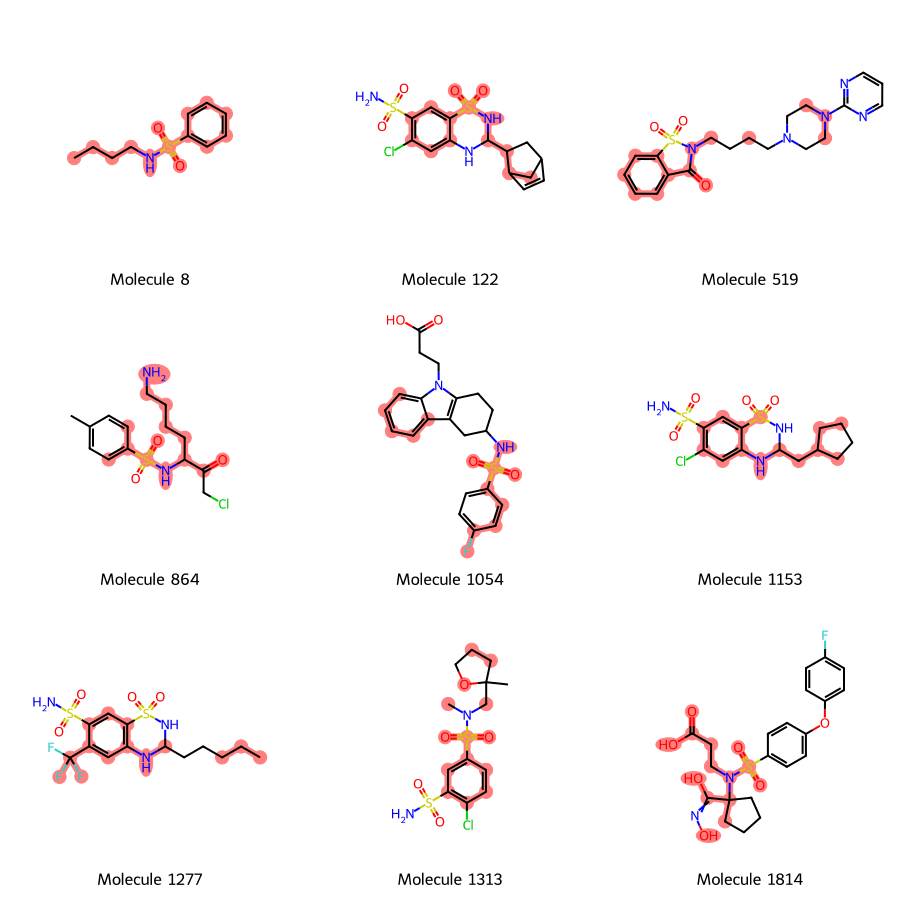

In [ ]:
# 5. Visualize the Matches and highlights of the substructure
legends = [f'Molecule {i}' for i in indices_with_matches]
img = Draw.MolsToGridImage(molecules_with_matches,
                     molsPerRow=3,
                     subImgSize=(300, 300),
                     highlightAtomLists=highlightAtomLists,
                     legends=legends
                     )
img

In [ ]:
# 6. Save the image
svg = img.data
with open("molecules_with_highlights.svg", "w") as svg_file:
    svg_file.write(svg)

## 5. More than 1 Chemical Substructure Search<a name = 9></a>

### 5.1 Substructure 1 AND Substructure 2<a name = 10></a>

---



In [ ]:
pattern2 = Chem.MolFromSmarts('[#17]')

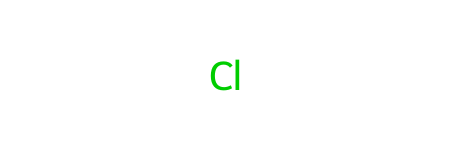

In [ ]:
pattern2

In [ ]:
match_indicator_2 = np.full((len(data), ), 0 , dtype = 'int64')

for i in range(0, len(data)):
    if data['Molecule'][i].HasSubstructMatch(pattern1) & data['Molecule'][i].HasSubstructMatch(pattern2):
        match_indicator_2[i] = 1

data['Filter_2_patterns'] = match_indicator_2

In [ ]:
data.head()

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,Filter,Filter_2_patterns
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,<rdkit.Chem.rdchem.Mol object at 0x7f57e65e6110>,0,0
1,C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O,Active,active antagonist,inactive,-37.9252,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3ce82e0>,0,0
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.8470,,<rdkit.Chem.rdchem.Mol object at 0x7f57b7c6a3b0>,0,0
3,CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...,Active,active antagonist,inactive,-35.5194,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651850>,0,0
4,CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2,Active,active antagonist,inactive,-39.4007,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651930>,0,0


In [ ]:
filtered_mol_2 = data.loc[data['Filter_2_patterns'] == 1]
filtered_mol_2

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,Filter,Filter_2_patterns
122,C1C2CC(C1C=C2)C3NC4=CC(=C(C=C4S(=O)(=O)N3)S(=O...,Inactive,inactive,inactive,0.0,,<rdkit.Chem.rdchem.Mol object at 0x7f57b36c1620>,1,1
864,CC1=CC=C(C=C1)S(=O)(=O)N[C@@H](CCCCN)C(=O)CCl.Cl,Inactive,inactive,inactive,0.0,,<rdkit.Chem.rdchem.Mol object at 0x7f57b35b9460>,1,1
1153,C1CCC(C1)CC2NC3=CC(=C(C=C3S(=O)(=O)N2)S(=O)(=O...,Inactive,inactive,inactive,0.0,,<rdkit.Chem.rdchem.Mol object at 0x7f57b360b840>,1,1
1313,CC1(CCCO1)CN(C)S(=O)(=O)C2=CC(=C(C=C2)Cl)S(=O)...,Inactive,inactive,inactive,0.0,,<rdkit.Chem.rdchem.Mol object at 0x7f57b344d310>,1,1


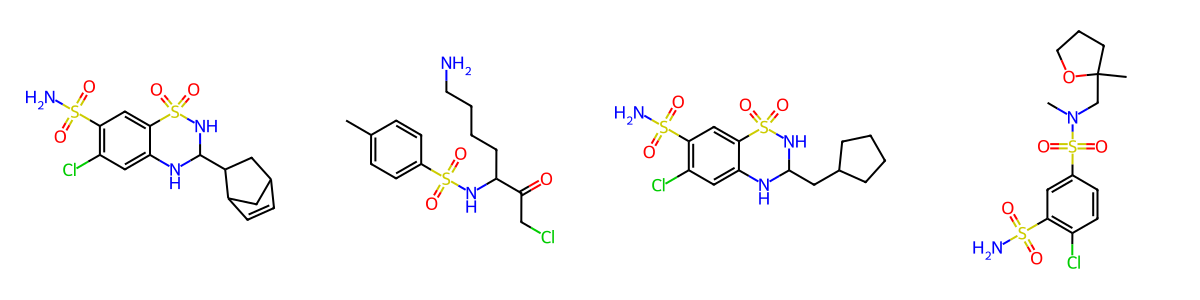

In [ ]:
img_2 = Draw.MolsToGridImage(filtered_mol_2['Molecule'],
                     molsPerRow=4,
                     subImgSize=(300, 300))
img_2

In [ ]:
svg = img_2.data
with open("matches_pattern1_and_pattern2.svg", "w") as svg_file:
    svg_file.write(svg)

### 5.2 Substructure 1 OR Substructure 2<a name = 11></a>

---


In [ ]:
match_indicator_3 = np.full((len(data), ), 0 , dtype = 'int64')

for i in range(0, len(data)):
    if data['Molecule'][i].HasSubstructMatch(pattern1) | data['Molecule'][i].HasSubstructMatch(pattern2):
        match_indicator_3[i] = 1

data['Filter_or_patterns'] = match_indicator_3

In [ ]:
filtered_mol_3 = data.loc[data['Filter_or_patterns'] == 1]
filtered_mol_3

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,Filter,Filter_2_patterns,Filter_or_patterns
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.8470,,<rdkit.Chem.rdchem.Mol object at 0x7f57b7c6a3b0>,0,0,1
8,CCCCNS(=O)(=O)C1=CC=CC=C1,Active,active antagonist,inactive,-39.8567,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651b60>,1,0,1
9,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3)Cl,Active,active antagonist,inactive,-39.0402,,<rdkit.Chem.rdchem.Mol object at 0x7f57b3651c40>,0,0,1
34,C1=C2C(C(=O)N(C2=CC(=C1F)Cl)C(=O)N)C(=O)C3=CC(...,Inactive,inactive,active antagonist,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b36529d0>,0,0,1
53,CC1=NN(C(=O)C1N=NC2=CC=CC=C2)C3=C(C=CC(=C3)S(=...,Inactive,inactive,active antagonist,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b36534c0>,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5103,O.O.O.O.O.O.Cl[Dy](Cl)Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b311d4d0>,0,0,1
5106,C1=CC=C(C=C1)OC2=CC=C(C=C2)Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b311d620>,0,0,1
5107,C(COC(=O)Cl)OC(=O)Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b311d690>,0,0,1
5113,C#CC1=C(C(=O)C(=C(C1=O)Cl)Cl)C#C,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x7f57b311d9a0>,0,0,1


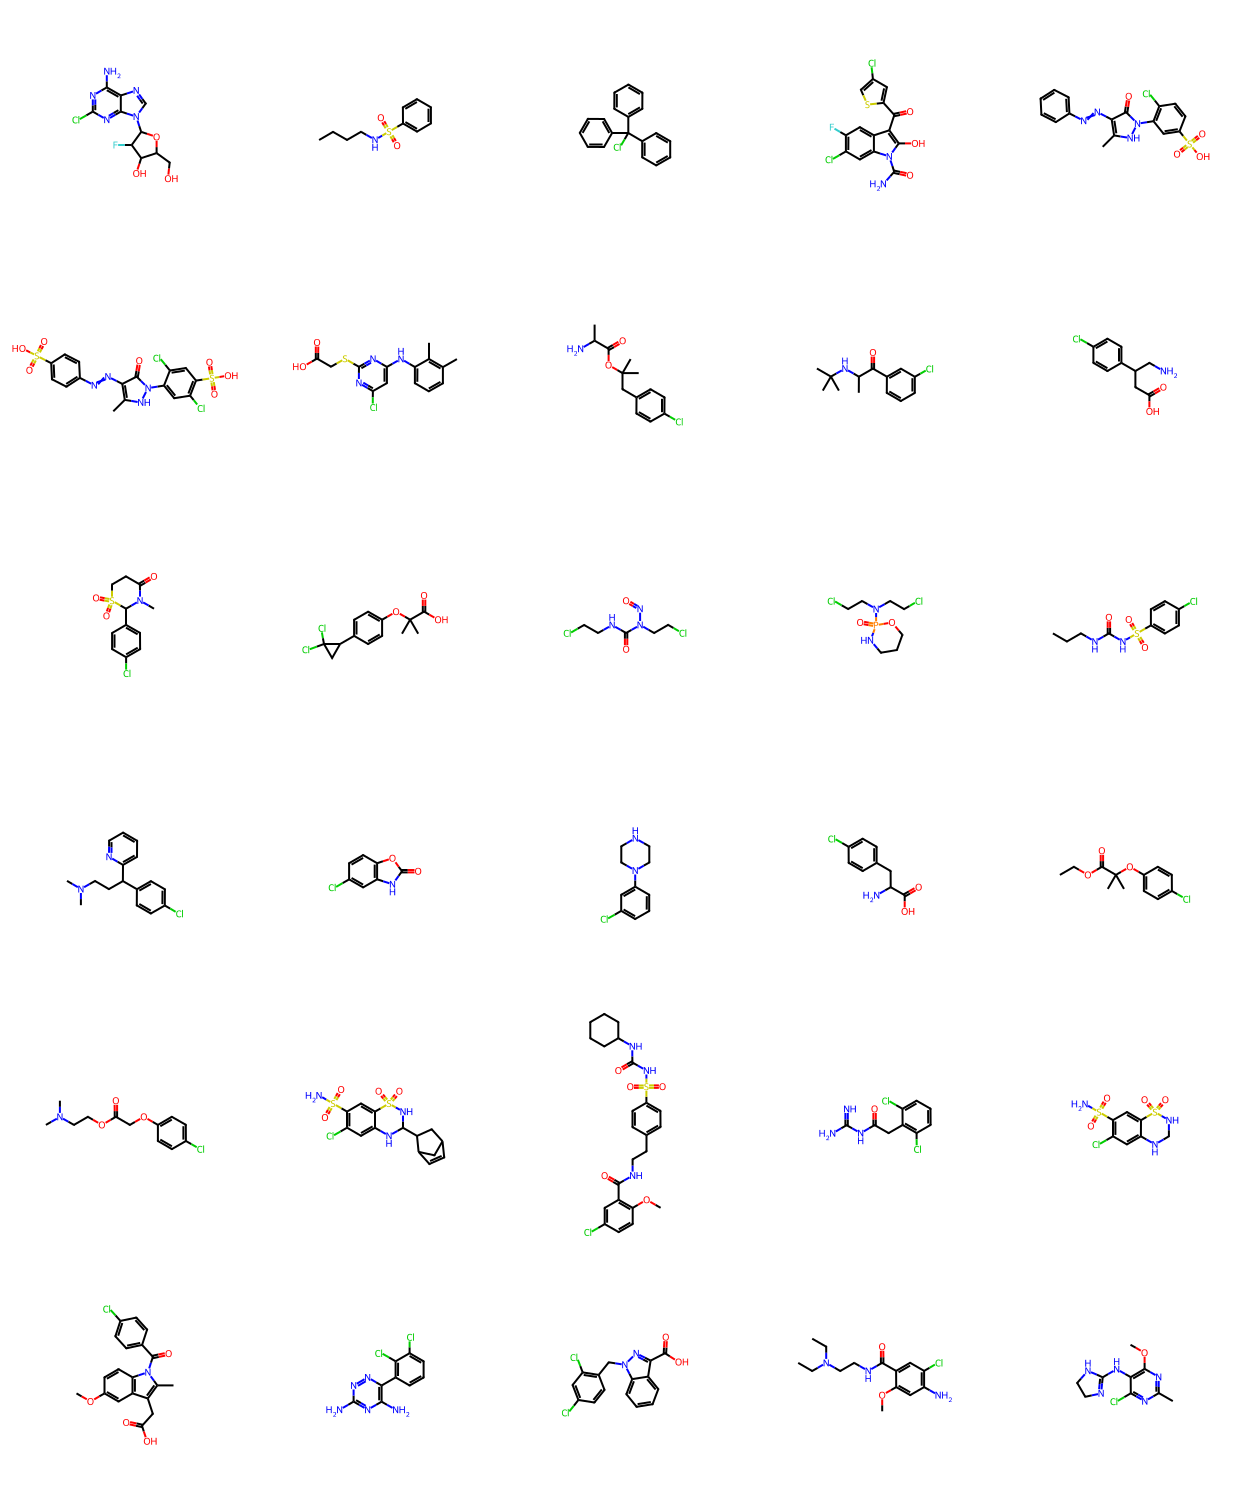

In [ ]:
img_3 = Draw.MolsToGridImage(filtered_mol_3['Molecule'][:30],
                     molsPerRow=5,
                     subImgSize=(250, 250))
img_3

In [ ]:
svg = img_3.data
with open("matches_pattern1_or_pattern2.svg", "w") as svg_file:
    svg_file.write(svg)